Importing python packages

In [1]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()

In [2]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

Importing the master Form A dataset (variables extracted for main GUSTO cohort and IVF cohort)

In [3]:
file = '/home/mukkesh/Manuscript1_final/FormA392_20191206.xlsx'
df = pd.read_excel(file, index_col = "SubjectID")

Inspecting the dataset

In [4]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                        float64
bw_percentile_Lancet2011                                    float64
size_at_birth_Lancet2011                                     object
LGA_Lancet2011_bin                                          float64
children_at_home                                             object
working_situation                                            object
childcare_arr_1                                              object
childcare_arr_1_specify                                      object
childcare_arr_1_recoded                                      object
childcare_arr_2                                              object
childcare_arr_2_specify                                      object
childcare_arr_2_recoded                                      object
childcare_arr_3                                              object
childcare_arr_3_specify                                      object
childcare_arr_3_recoded                         

In [5]:
df.head()

bw_zscore_Lancet2011  bw_percentile_Lancet2011  \
SubjectID                                                   
010-04002                 -0.28                     39.05   
010-04004                  0.22                     58.85   
010-04006                  2.10                     98.22   
010-04010                 -0.77                     22.08   
010-04011                 -0.30                     38.33   

          size_at_birth_Lancet2011  LGA_Lancet2011_bin children_at_home  \
SubjectID                                                                 
010-04002                      AGA                 0.0              NaN   
010-04004                      AGA                 0.0            1_yes   
010-04006                      LGA                 1.0              NaN   
010-04010                      AGA                 0.0              NaN   
010-04011                      AGA                 0.0              NaN   

          working_situation childcare_arr_1 childcare_arr_1_specify  \
SubjectID                                                             
010-04002               NaN             NaN                     NaN   
010-04004               NaN             NaN                     NaN   
010-04006               NaN             NaN                     NaN   
010-04010               NaN             NaN                     NaN   
010-04011               NaN             NaN                     NaN   

          childcare_arr_1_recoded childcare_arr_2 childcare_arr_2_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_2_recoded childcare_arr_3 childcare_arr_3_specify  \
SubjectID                                                                   
010-04002                     NaN             NaN                     NaN   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04010                     NaN             NaN                     NaN   
010-04011                     NaN             NaN                     NaN   

          childcare_arr_3_recoded  number_weeks_been_pregnant  \
SubjectID                                                       
010-04002                     NaN                         8.0   
010-04004                     NaN                         6.0   
010-04006                     NaN                         6.0   
010-04010                     NaN                         9.0   
010-04011                     NaN                         7.0   

          was_pregnancy_planned  was_pregnancy_planned_binary change_of_diet  \
SubjectID                                                                      
010-04002                  0_no                           0.0            NaN   
010-04004                  0_no                           0.0            NaN   
010-04006                 1_yes                           1.0           0_no   
010-04010                 1_yes                           1.0          1_yes   
010-04011                 1_yes                           1.0           0_no   

          reason_for_pregnancy contraceptive_method_failed_1  \
SubjectID                                                      
010-04002     no_contraception                           NaN   
010-04004     no_contraception                           NaN   
010-04006                  NaN                           NaN   
010-04010                  NaN                           NaN   
010-04011                  NaN                           NaN   

          con

Removing subjects who self-reported Type 2 Diabetes (T2D) at pregnancy week 11

In [6]:
df.drop(['010-20008', '010-20191', '010-20224'], inplace=True)

Removing Subject ID 010-21272 (mother is of other ethnicity, Mother is Indian Muslim (IC says Indian race and Malay dialect) and genetic PCA positions her in between Malay and Indian cluster

In [7]:
df.drop(['010-21272'], inplace=True)

In [8]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 17.4+ MB


bw_zscore_Lancet2011                                 1174
bw_percentile_Lancet2011                             1174
size_at_birth_Lancet2011                             1174
LGA_Lancet2011_bin                                   1174
children_at_home                                     1340
working_situation                                     705
childcare_arr_1                                       435
childcare_arr_1_specify                                32
childcare_arr_1_recoded                               435
childcare_arr_2                                       435
childcare_arr_2_specify                                41
childcare_arr_2_recoded                               435
childcare_arr_3                                       435
childcare_arr_3_specify                                14
childcare_arr_3_recoded                               435
number_weeks_been_pregnant                           1192
was_pregnancy_planned                                1204
was_pregnancy_

GDM status in GUSTO original dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [9]:
df['m_gdm_who_1999'].value_counts(dropna=False)

No     939
NaN    298
Yes    223
Name: m_gdm_who_1999, dtype: int64

Calculating the prevalence of GDM (%) in original dataset

In [10]:
(223/(939+223))*100

19.19104991394148

Plotting the distribution of gestational age when antenatal OGTT was performed

/home/mukkesh/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mukkesh/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


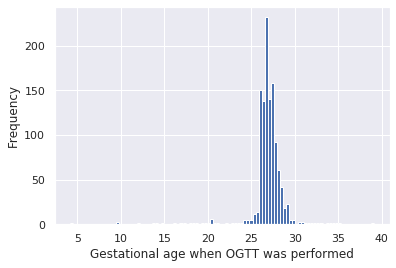

In [11]:
plt.hist(df['m_ogtt_gestationalweek'], 100)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga', dpi=100)
plt.show()

In [12]:
df['m_ogtt_gestationalweek'].describe()

count    1162.000000
mean       26.833029
std         2.129868
min         4.140000
25%        26.430000
50%        26.860000
75%        27.570000
max        39.140000
Name: m_ogtt_gestationalweek, dtype: float64

In [13]:
df_24wks = df[df['m_ogtt_gestationalweek'] < 24]
print(df_24wks.shape)

(36, 1557)


In [14]:
df_29wksogtt = df[df['m_ogtt_gestationalweek'] >= 29]
print(df_29wksogtt.shape)

(54, 1557)


Removing subjects who are less than 24 weeks or more than 29 weeks of gestational age when OGTT was performed

In [15]:
df = df.drop(df[(df.m_ogtt_gestationalweek < 24)].index)
df = df.drop(df[(df.m_ogtt_gestationalweek >= 29)].index)

In [16]:
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 010-04002 to 029-75019
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 16.3+ MB


bw_zscore_Lancet2011                                 1088
bw_percentile_Lancet2011                             1088
size_at_birth_Lancet2011                             1088
LGA_Lancet2011_bin                                   1088
children_at_home                                     1258
working_situation                                     658
childcare_arr_1                                       406
childcare_arr_1_specify                                31
childcare_arr_1_recoded                               406
childcare_arr_2                                       406
childcare_arr_2_specify                                38
childcare_arr_2_recoded                               406
childcare_arr_3                                       406
childcare_arr_3_specify                                13
childcare_arr_3_recoded                               406
number_weeks_been_pregnant                           1107
was_pregnancy_planned                                1116
was_pregnancy_

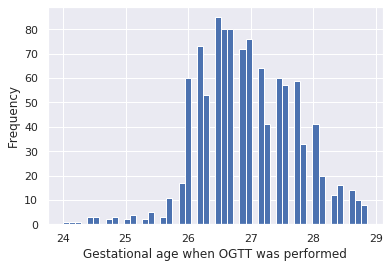

In [17]:
plt.hist(df['m_ogtt_gestationalweek'], 50)
plt.xlabel('Gestational age when OGTT was performed')
plt.ylabel('Frequency')
plt.savefig('ga_2428', dpi=100)
plt.show()

In [18]:
df['m_ogtt_gestationalweek'].describe()

count    1072.000000
mean       26.938293
std         0.784757
min        24.000000
25%        26.430000
50%        26.860000
75%        27.570000
max        28.860000
Name: m_ogtt_gestationalweek, dtype: float64

In [19]:
df.rename(columns=
          {'PAI-1': 'PAI1', 'MCP-1': 'MCP1', 'IGF-I': 'IGFI', 'IGF-II': 'IGFII', 'IGFBP-1': 'IGFBP1', 'IGFBP-3': 'IGFBP3', 'IGFBP-7': 'IGFBP7', 'C-Peptide': 'CPeptide', 'IGFBP-4': 'IGFBP4'}, inplace=True)

Importing scikit-learn machine learning packages and modules

In [20]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from statistics import mean, stdev
from sklearn.externals import joblib

/home/mukkesh/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Multiethnic model (Chinese, Malay, Indian)

In [21]:
df1=df.dropna(subset=['map_est_first_antenatal', 'mother_age_recruitment', 'pw11_any_gdm_outcome_cat', 'm_ethnicity_malay_bin', 'm_height_pw26', 'Adiponectin', 'IGFI', 'm_HEI_dairy_pw26', 'm_HEI_total_grains&_tubers_pw26', 'm_gdm_who_1999_cat'])


In [22]:
df1.head()

bw_zscore_Lancet2011  bw_percentile_Lancet2011  \
SubjectID                                                   
010-04004                  0.22                     58.85   
010-04006                  2.10                     98.22   
010-04020                  0.34                     63.40   
010-04022                  0.63                     73.61   
010-04023                  2.08                     98.12   

          size_at_birth_Lancet2011  LGA_Lancet2011_bin children_at_home  \
SubjectID                                                                 
010-04004                      AGA                 0.0            1_yes   
010-04006                      LGA                 1.0              NaN   
010-04020                      AGA                 0.0             0_no   
010-04022                      AGA                 0.0            1_yes   
010-04023                      LGA                 1.0             0_no   

          working_situation childcare_arr_1 childcare_arr_1_specify  \
SubjectID                                                             
010-04004               NaN             NaN                     NaN   
010-04006               NaN             NaN                     NaN   
010-04020               NaN             NaN                     NaN   
010-04022         stay_home             NaN                     NaN   
010-04023               NaN             NaN                     NaN   

          childcare_arr_1_recoded childcare_arr_2 childcare_arr_2_specify  \
SubjectID                                                                   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04020                     NaN             NaN                     NaN   
010-04022                     NaN             NaN                     NaN   
010-04023                     NaN             NaN                     NaN   

          childcare_arr_2_recoded childcare_arr_3 childcare_arr_3_specify  \
SubjectID                                                                   
010-04004                     NaN             NaN                     NaN   
010-04006                     NaN             NaN                     NaN   
010-04020                     NaN             NaN                     NaN   
010-04022                     NaN             NaN                     NaN   
010-04023                     NaN             NaN                     NaN   

          childcare_arr_3_recoded  number_weeks_been_pregnant  \
SubjectID                                                       
010-04004                     NaN                         6.0   
010-04006                     NaN                         6.0   
010-04020                     NaN                         5.0   
010-04022                     NaN                         6.0   
010-04023                     NaN                         2.0   

          was_pregnancy_planned  was_pregnancy_planned_binary change_of_diet  \
SubjectID                                                                      
010-04004                  0_no                           0.0            NaN   
010-04006                 1_yes                           1.0           0_no   
010-04020                  0_no                           0.0            NaN   
010-04022                 1_yes                           1.0           0_no   
010-04023                 1_yes                           1.0          1_yes   

          reason_for_pregnancy contraceptive_method_failed_1  \
SubjectID                                                      
010-04004     no_contraception                           NaN   
010-04006                  NaN                           NaN   
010-04020     no_contraception                           NaN   
010-04022                  NaN                           NaN   
010-04023                  NaN                           NaN   

          con

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 010-04004 to 020-75021
Columns: 1557 entries, bw_zscore_Lancet2011 to SR_hypertension_flag_remarks
dtypes: datetime64[ns](1), float64(1003), object(553)
memory usage: 10.8+ MB


Drop rows of pandas dataframe whose value is NaN 

In [24]:
df2 = df1[['map_est_first_antenatal', 'mother_age_recruitment', 'pw11_any_gdm_outcome_cat', 'm_ethnicity_malay_bin', 'm_HEI_dairy_pw26', 'm_gdm_who_1999_cat']]


In [25]:
df2.head()

,map_est_first_antenatal,mother_age_recruitment,pw11_any_gdm_outcome_cat,m_ethnicity_malay_bin,m_HEI_dairy_pw26,m_gdm_who_1999_cat
SubjectID,,,,,,
010-04004,97.3,29.43,0.0,1.0,5.60,0.0
010-04006,101.3,27.53,0.0,0.0,10.00,0.0
010-04020,70.0,38.72,0.0,0.0,0.00,0.0
010-04022,92.0,35.97,0.0,0.0,10.00,1.0
010-04023,76.3,34.21,0.0,0.0,7.91,0.0


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 010-04004 to 020-75021
Data columns (total 6 columns):
map_est_first_antenatal     909 non-null float64
mother_age_recruitment      909 non-null float64
pw11_any_gdm_outcome_cat    909 non-null float64
m_ethnicity_malay_bin       909 non-null float64
m_HEI_dairy_pw26            909 non-null float64
m_gdm_who_1999_cat          909 non-null float64
dtypes: float64(6)
memory usage: 49.7+ KB


GDM status in GUSTO complete dataset (WHO 1999 classifications, where FG >= 7.0 mmol/L or PG >=7.8 mmol/L)

In [27]:
df2['m_gdm_who_1999_cat'].value_counts(dropna=False)

0.0    755
1.0    154
Name: m_gdm_who_1999_cat, dtype: int64

Calculating the prevalence of GDM (%) in complete dataset

In [28]:
(154/(755+154))*100

16.94169416941694

Generating a heatmap of variables

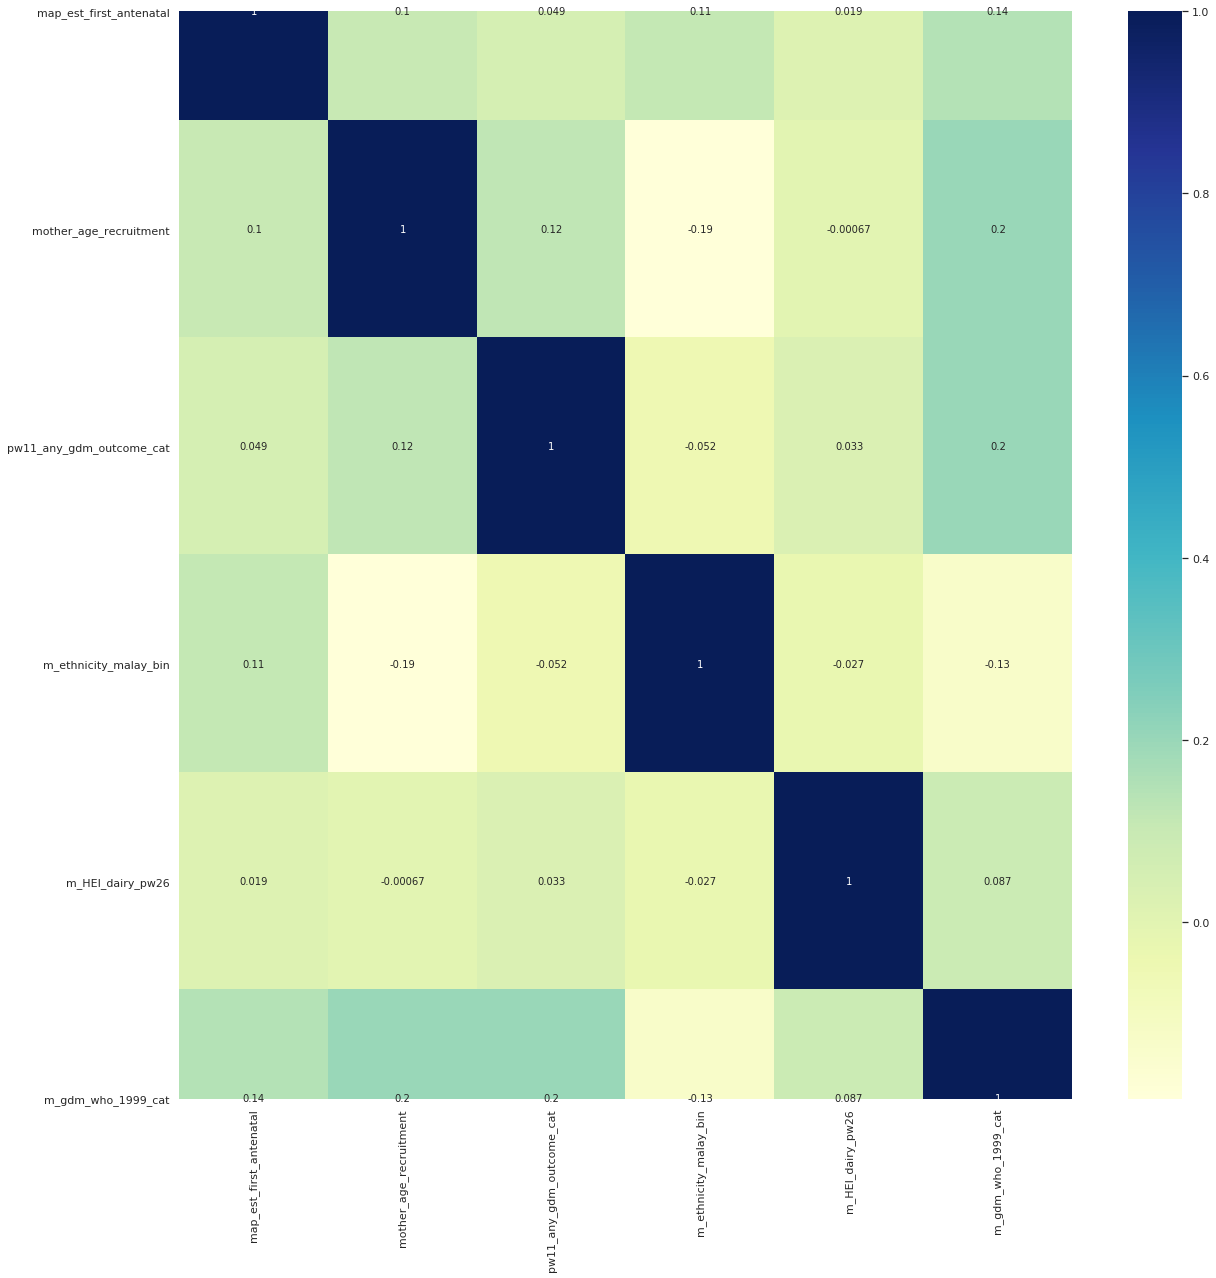

In [29]:
ax = sns.heatmap(df2.corr(method='spearman'), annot=True, cmap="YlGnBu")
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig('heatmap_spearmancorr_ni4f_di', bbox_inches='tight', dpi=300)

Generating X & Y matrices

In [30]:
X=df2.loc[:, df2.columns != 'm_gdm_who_1999_cat']
y=df2.loc[:, df2.columns == 'm_gdm_who_1999_cat']

Create the Neural Network classifier object

In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

Create the grid search parameter grid

In [32]:
clf_param_grid = {
    'hidden_layer_sizes': [10, 10, 10],
    'activation': ["relu"],
    'solver': ["adam"],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.00001, 0.0001, 0.001, 0.01, 0.1],
}

In [33]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.10, random_state=0)
grid_ni4f_di_auc_nn = GridSearchCV(estimator=clf, param_grid=clf_param_grid, scoring='roc_auc', cv=sss, verbose=1, n_jobs=-1)

Fit the estimator

In [34]:
grid_ni4f_di_auc_nn.fit(MaxAbsScaler().fit_transform(X), y)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:    5.3s finished
/home/mukkesh/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.1,
            train_size=None),
             error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     m...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                   

Compute metrics

In [35]:
AUC = grid_ni4f_di_auc_nn.best_score_

In [36]:
AUC

0.8437719298245613

In [37]:
print(grid_ni4f_di_auc_nn.best_params_)
print(grid_ni4f_di_auc_nn.best_estimator_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 10, 'learning_rate_init': 0.01, 'solver': 'adam'}
MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [38]:
std = grid_ni4f_di_auc_nn.cv_results_['std_test_score'][grid_ni4f_di_auc_nn.best_index_]

In [39]:
std

0.032283085342967324

In [40]:
print("AUC: %0.3f (+/- %0.3f)" % (AUC, std * 1.96))

AUC: 0.844 (+/- 0.063)


Save the best model as a 'Pickle' - saving the pickled model as a file

In [41]:
# Output a pickle file for the model
joblib.dump(grid_ni4f_di_auc_nn.best_estimator_, 'ni4f_di_auc_nn.pkl')

['ni4f_di_auc_nn.pkl']

Load the pickled model to make predictions on unseen data (in future)

In [42]:
ni4f_di_auc_nn = joblib.load('ni4f_di_auc_nn.pkl')